In [10]:
import pandas as pd
from plot import (
    plot_sales_over_time,
    plot_revenue_over_time,
    plot_product_sales,
    plot_channel_trends,
    plot_sales_distribution,
    plot_revenue_distribution,
    plot_sales_vs_stock,
    plot_revenue_vs_store,
    plot_correlation_heatmap,
    plot_weekly_sales
)

import matplotlib.pyplot as plt

def load_and_prepare_data():
    # --- Load CSVs ---
    train = pd.read_csv("data/train.csv", delimiter="|")
    price = pd.read_csv("data/price.csv", delimiter="|")
    promo = pd.read_csv("data/promotion.csv", delimiter="|")
    product_groups = pd.read_csv("data/product_groups.csv", delimiter="|")

    # --- Convert dates ---
    train["date"] = pd.to_datetime(train["date"])
    price["date"] = pd.to_datetime(price["date"])
    promo["date"] = pd.to_datetime(promo["date"])

    # --- Merge price with train ---
    # Keys: (product_id, channel_type, date)
    df = train.merge(
        price,
        how="left",
        on=["product_id", "channel_type", "date"]
    )

    # --- Merge promotion info ---
    # Some products on some dates may not have promos → left merge
    df = df.merge(
        promo,
        how="left",
        on=["product_id", "channel_type", "date"]
    )

    # --- Merge product hierarchy info ---
    df = df.merge(
        product_groups,
        how="left",
        left_on="product_id",
        right_on="product_agg_level"
    )

    # Drop duplicate product_agg_level column
    df = df.drop(columns=["product_agg_level"])

    # --- Fill missing values that LightGBM can handle ---
    df["promo_type"] = df["promo_type"].fillna("no_promo")
    df["price_with_tax"] = df["price_with_tax"].fillna(method="ffill")

    return df


def run_plots(df):
    # Basic time-series
    plot_sales_over_time(df)
    plot_revenue_over_time(df)
    
    # Channel-level trends
    plot_channel_trends(df)

    # Distros
    plot_sales_distribution(df)
    plot_revenue_distribution(df)

    # Relationships
    plot_sales_vs_stock(df)
    plot_revenue_vs_store(df)

    # Weekly aggregated trend
    plot_weekly_sales(df)

    # Correlations
    plot_correlation_heatmap(df)

    # Example product-level plot
    example_product = df["product_id"].iloc[0]
    plot_product_sales(df, example_product)


/var/folders/4g/k_7zl9gs06gdxv5l5p8xsw9m0000gn/T/ipykernel_26726/1254420446.py:58: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["price_with_tax"] = df["price_with_tax"].fillna(method="ffill")


Merged dataset shape: (3783764, 14)
   product_id channel_type  sales_quantity_sum  sales_revenue_sum  \
0      100045    channel_1               327.0             3682.2   
1      100219    channel_2                 0.0                0.0   
2      100367    channel_3                 0.0                0.0   
3      100542    channel_1                 2.0              331.9   
4      100607    channel_1               163.0             1405.2   

   store_count_max  stock_days       date  price_with_tax promo_type  \
0                1           7 2025-02-03           13.25   no_promo   
1                3          21 2025-02-03           13.25   no_promo   
2                1           7 2025-02-03           13.25   no_promo   
3                1           2 2025-02-03           13.25   no_promo   
4                1           7 2025-02-03           13.25   no_promo   

   brand_code  product_hierarchy_1 product_hierarchy_2 product_hierarchy_3  \
0      1279.0                   23    

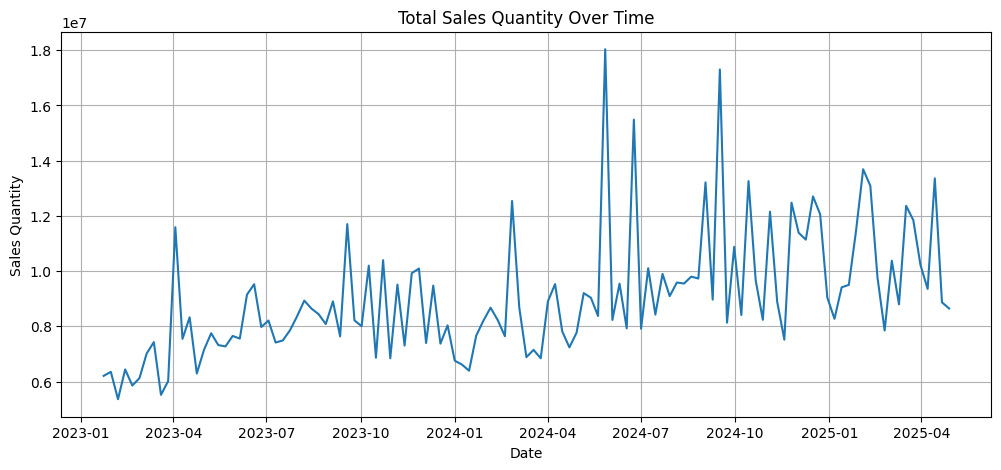

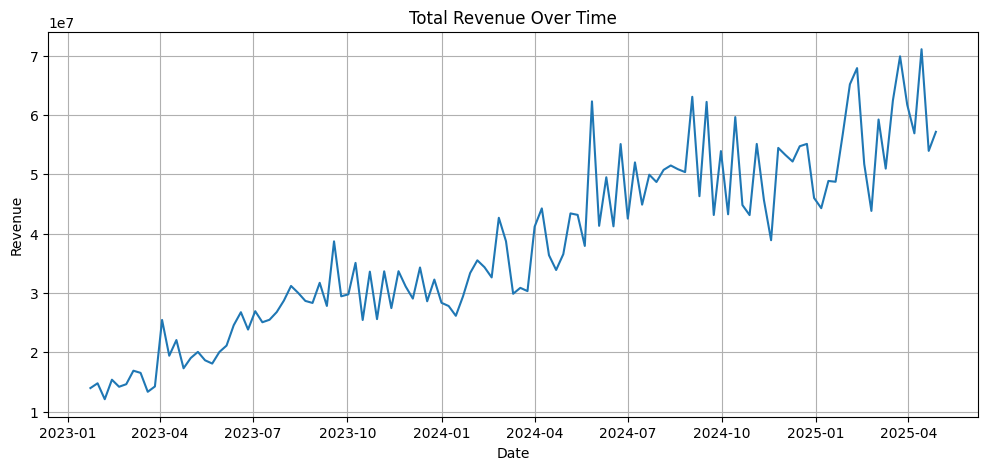

/Users/suedanisaokutan/Desktop/algorun/algorun/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


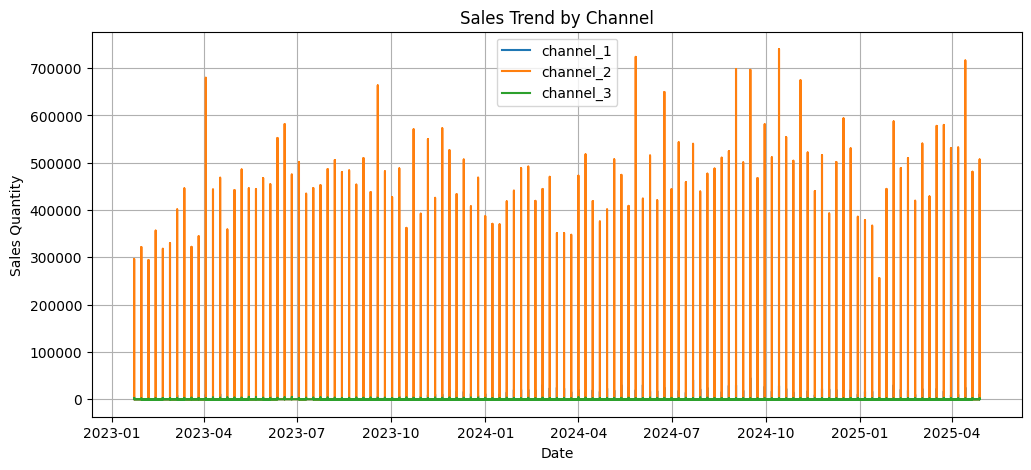

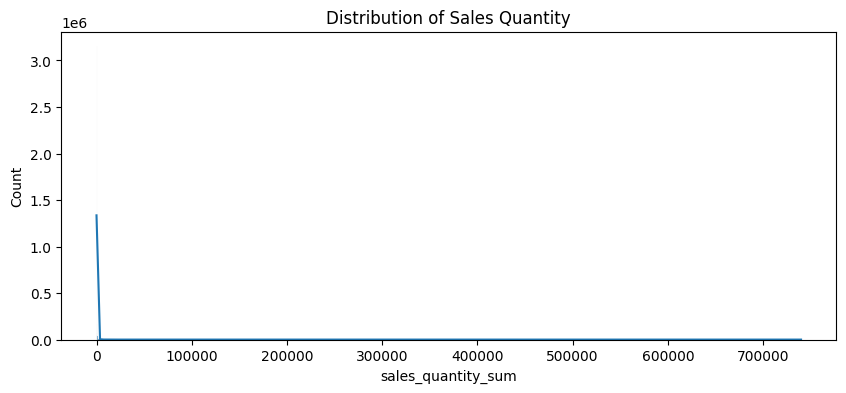

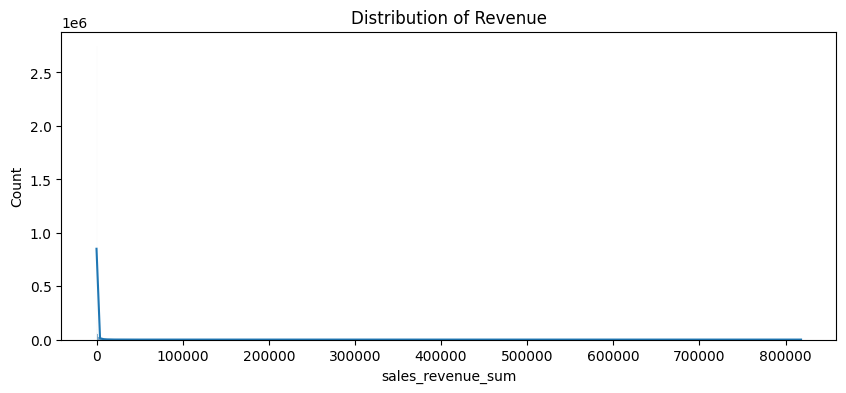

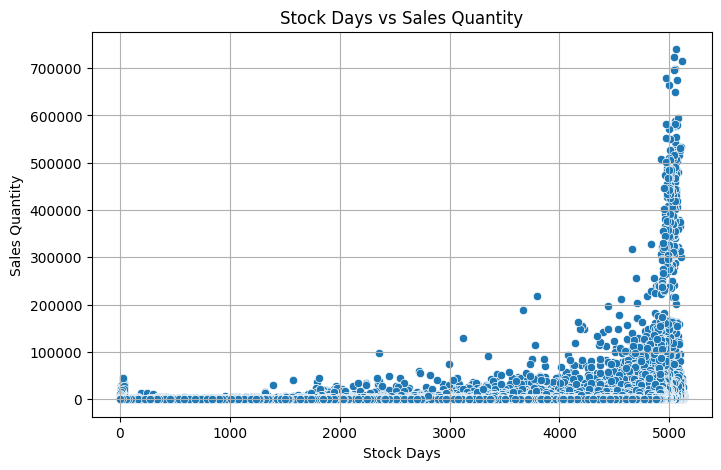

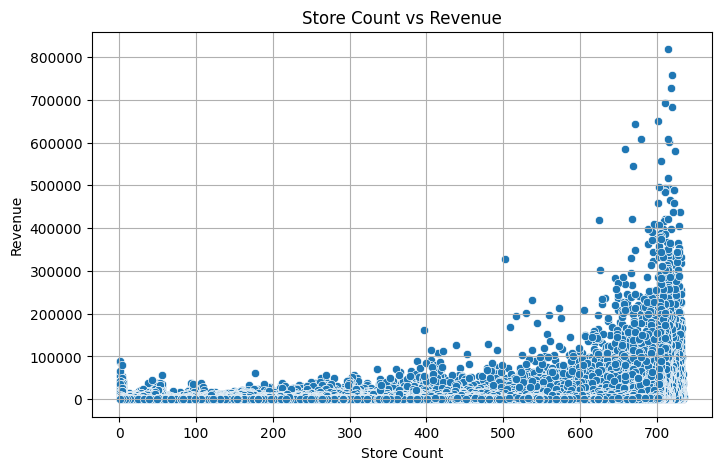

In [ ]:

df = load_and_prepare_data()    
print("Merged dataset shape:", df.shape)
print(df.head())
run_plots(df)

    # Later you can build LightGBM features here
    # ...



In [5]:
train = pd.read_csv("data/train.csv", delimiter="|")
train_df = train.copy()

train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783764 entries, 0 to 3783763
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   product_id          int64  
 1   channel_type        object 
 2   sales_quantity_sum  float64
 3   sales_revenue_sum   float64
 4   store_count_max     int64  
 5   stock_days          int64  
 6   date                object 
dtypes: float64(2), int64(3), object(2)
memory usage: 202.1+ MB


,product_id,sales_quantity_sum,sales_revenue_sum,store_count_max,stock_days
count,3.783764e+06,3.783764e+06,3.783764e+06,3.783764e+06,3.783764e+06
mean,5.210180e+04,2.839916e+02,1.192937e+03,1.491606e+02,1.017166e+03
std,3.004292e+04,3.701868e+03,5.773107e+03,2.465800e+02,1.692948e+03
min,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.597500e+04,0.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00
50%,5.197800e+04,3.000000e+00,9.900000e+00,6.000000e+00,4.200000e+01
75%,7.822000e+04,5.300000e+01,2.994500e+02,1.760000e+02,1.186000e+03
max,1.041350e+05,7.399240e+05,8.180199e+05,7.350000e+02,5.131000e+03
